### 7) 범주형 독립변수

In [1]:
#1920~1939년 노팅엄 지역 월 평균 기온 데이터

import pandas as pd

df = pd.read_csv('c:/workspace3/data/degree_data.csv')
df

,year,month,value
0,1920,1,40.6
1,1920,2,40.8
2,1920,3,44.4
3,1920,4,46.7
4,1920,5,54.1
...,...,...,...
235,1939,8,61.8
236,1939,9,58.2
237,1939,10,46.7
238,1939,11,46.6


<Axes: title={'center': 'value'}, xlabel='month'>

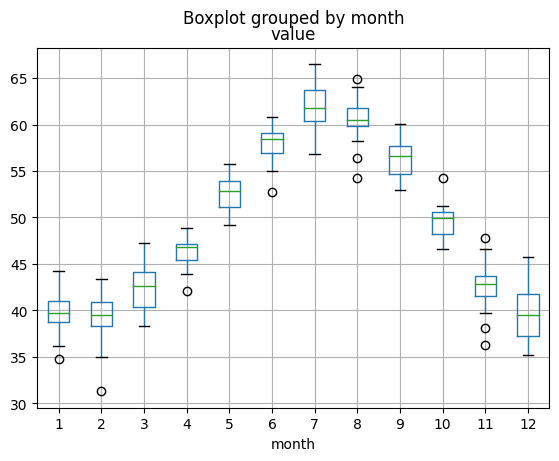

In [2]:
%matplotlib inline
#boxplot(y,x)
df.boxplot("value", "month")

In [4]:
# 카테고리형 변수인 월이 연속숫자형으로 인식되지 않도록 C() 함수 사용

In [7]:
import statsmodels.api as sm

# +0을 붙이면 1월~12월이 평균기온으로 처리됨
# coef는 월의 평균기온
model = sm.OLS.from_formula("value ~ C(month)+0", df)
#                              종속 ~ 독립
#                                       C(month) => month 수치 = > 범주형

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          2.96e-125
Time:                        09:39:00   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]     39.6950      0.518     76.691   

In [8]:
# +0이 없으면 첫번째 변수인 1월은 제외하고 1월을 기준으로 각 월의 평균 기온이
# 1월보다 얼마나 더 높은지 낮은지를 나타내는 값이 회귀모형의 계수가 된다.

model = sm.OLS.from_formula("value ~ C(month)", df)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          2.96e-125
Time:                        09:39:08   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.